# Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique that transforms data into a new coordinate system where:
* The first axis (PC1) captures the maximum variance
* Each subsequent axis captures the maximum remaining variance orthogonal to previous axes.

When to Use PCA:
* Visualization: Reduce to 2D or 3D for plotting
* Feature Extraction: Create uncorrelated features
* Noise Reduction: Remove low-variance components
* Computational Efficiency: Reduce features before expensive algorithms

[Click Here](https://medium.com/@dhanyahari07/principal-component-analysis-a-numerical-approach-88a8296dc2dc) to check the Numerical Example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Set random seed for reproducibility
np.random.seed(10)


In [2]:
df = pd.read_csv("./data/titanic_cleaned.csv")
df.head()

,Survived,Pclass,Sex,Age,Siblings,Parents,Fare,Embarked_Q,Embarked_S
0,0,3,0,22,1,0,7.2500,False,True
1,1,3,1,26,0,0,7.9250,False,True
2,1,1,1,35,1,0,53.1000,False,True
3,0,3,0,35,0,0,8.0500,False,True
4,0,3,0,29,0,0,8.4583,True,False


In [3]:
X = df.drop('Survived', axis=1).values
y = df['Survived'].values

feature_names = df.drop('Survived', axis=1).columns.tolist()
print(feature_names)

['Pclass', 'Sex', 'Age', 'Siblings', 'Parents', 'Fare', 'Embarked_Q', 'Embarked_S']


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

PCA is sensitive to feature scales. Features with larger scales will dominate the principal components. So, we always standardize before applying PCA!

In [13]:
pca_2d = PCA(n_components=2)
X_pca_2d  = pca_2d.fit_transform(X_scaled)


print("PCA Results ('2 Components') ")
print(f"Original Shape: {X.shape}")
print(f"Transformed Shape: {X_pca_2d.shape}")
print(f"Explained Variance Ratio: {pca_2d.explained_variance_ratio_}")
print(f"Cumulative Explained Variance: {np.cumsum(pca_2d.explained_variance_ratio_)}")
print(f"Total Variance Explained: {pca_2d.explained_variance_ratio_.sum()}")

PCA Results ('2 Components') 
Original Shape: (775, 8)
Transformed Shape: (775, 2)
Explained Variance Ratio: [0.25060628 0.23178493]
Cumulative Explained Variance: [0.25060628 0.48239121]
Total Variance Explained: 0.482391208326014


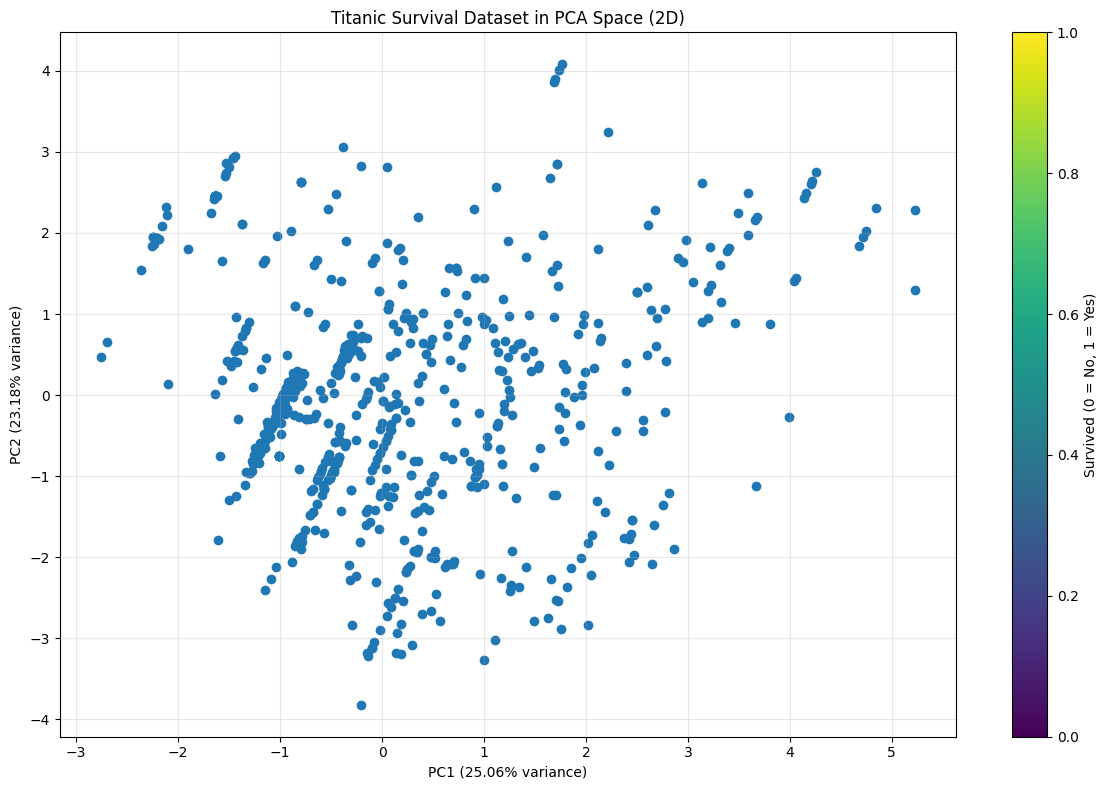

In [15]:
plt.figure(figsize=(12, 8))

scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1])
plt.xlabel(f"PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)")
plt.ylabel(f"PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)")
plt.title("Titanic Survival Dataset in PCA Space (2D)")
plt.colorbar(scatter, label='Survived (0 = No, 1 = Yes)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Limitations:
* Linear Transformation: PCA only captures linear relationships.
* Interpretability: Principal components are linear combinations, harder to interpret.
* Scaling Sensitivity: Results depend heavily on feature scaling
* Outlier Sensitivity: Outliers can significantly affect principal components

### Best Practices:
1. Always Standardize your data before applying PCA.
2. Aim for 80-95% cumulative variance explained.
3. Consider Non-linear Alternatives (t-SNE, UMAP, etc) for complex data.